#### Problem Tutorial 1: Regression Model

We want to predict the gas consumption (in millions of gallons/year) in 48 of the US states
based on some key features. 

These features are 
 * petrol tax (in cents); 
 * per capital income (in US dollars);
 * paved highway (in miles); and
 * population of people with driving licences

<table>
  <tr><td>
    <img src="https://informedinfrastructure.com/wp-content/uploads/2012/06/traffic-jam.jpg"
         alt="Bank Note " width="600">
  </td></tr>
  <tr><td></td></tr>
  <tr><td>
  <img src="https://miro.medium.com/max/593/1*pfmeGgGM5sxmLBQ5IQfQew.png"
         alt="Matrix" width="600">
  <tr><td></td></tr>
  <tr><td>And seems like a bad consumption problem to have ...</td></tr>
</table>
  
#### Solution:

Since this is a regression problem where the value is a range of numbers, we can use the
common Random Forest Algorithm in Scikit-Learn. Most regression models are evaluated with
four [standard evalution metrics](https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4): 

* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RSME)
* R-squared (r2)

This example is borrowed from this [source](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/) and modified and modularized for this tutorial

Aim of this this:

1. Understand MLflow Tracking API
2. How to use the MLflow Tracking API
3. Use the MLflow API to experiment several Runs
4. Interpret and observe runs via the MLflow UI

Some Resources:
* https://mlflow.org/docs/latest/python_api/mlflow.html
* https://www.saedsayad.com/decision_tree_reg.htm
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914
* https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Define all the classes and bring them into scope

### Load the Dataset

In [1]:
%run ./setup/lab_utils_cls.ipynb
%run ./setup/rfr_regression_cls.ipynb
%run ./setup/rfc_classification_cls.ipynb
%run ./setup/rfr_regression_base_exp_cls.ipynb

In [9]:
# Load and print dataset
dataset = Utils.load_data("https://raw.githubusercontent.com/dmatrix/mlflow-workshop-part-1/master/data/petrol_consumption.csv")
dataset.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


Get descriptive statistics for the features

In [10]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id dd7826fa34a7406a96807d988a09d3cf and experiment_id 0
Estimator trees        : 20
Mean Absolute Error    : 54.48697169946864
Mean Squared Error     : 4318.663175664619
Root Mean Squared Error: 65.71653654647831
MLflow Run completed with run_id dd7826fa34a7406a96807d988a09d3cf and experiment_id 0
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Inside MLflow Run with run_id 2f6876e5e87843c2b4f811ef792e0037 and experiment_id 0
Estimator trees        : 70
Mean Absolute Error    : 52.76757374558217
Mean Squared Error     : 3951.3088720653564
Root Mean Squared Error: 62.85943741448341
MLflow Run completed with run_id 2f6876e5e87843c2b4f811ef792e0037 and experiment_id 0
--------------------------------------------

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

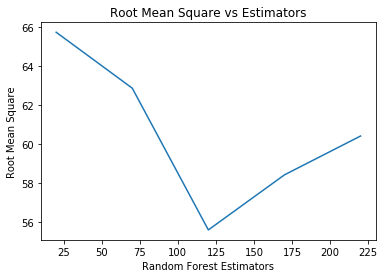

In [11]:
# Iterate over several runs with different parameters, such as number of trees. 
# For excercises, try changing max_depth, number of estimators, and consult the documentation what other tunning parameters
# may affect a better outcome and supply them to the class constructor
# Excercise 1 & 2: 
# 1) add key-value parameters to this list
# 2) iterate over the list
# 3) Compute R2 in the RFRModel class
max_depth = 0
for n in range (20, 250, 50):
  max_depth = max_depth + 2
  params = {"n_estimators": n, "max_depth": max_depth}
  rfr = RFRModel.new_instance(params)
  (experimentID, runID) = rfr.mlflow_run(dataset, run_name="Regression Petrol Consumption Model", verbose=True)
  print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
  print("-" * 100)

**Note**:

With 20 trees, the root mean squared error is `64.93`, which is greater than 10 percent of the average petrol consumption i.e., `576.77`. 
This may sugggest that we have not used enough estimators (trees).

### Let's Explore the MLflow UI

* Add Notes & Tags
* Compare Runs pick two best runs
* Annotate with descriptions and tags
* Evaluate the best run

In [ ]:
!mlflow ui

[2020-08-11 14:45:24 -0700] [60345] [INFO] Starting gunicorn 20.0.4
[2020-08-11 14:45:24 -0700] [60345] [INFO] Listening at: http://127.0.0.1:5000 (60345)
[2020-08-11 14:45:24 -0700] [60345] [INFO] Using worker: sync
[2020-08-11 14:45:24 -0700] [60348] [INFO] Booting worker with pid: 60348


#### Excercise Assignment. Try different runs with:
1. Change or add parameters, such as depth of the tree or random_state: 42 etc.
2. Change or alter the range of runs and increments of n_estimators
3. Compute R2 metric in the `RFRModel` class and and log the metric
3. Check in MLfow UI if the metrics are affected

#### HOMEWORK CHALLENGE
6. Change the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)
    * Add extra tunning parameters 
    * Compare the evaluation metrics and ascertain which one is better